In [3]:
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
import sqlite3

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)  
cursor = connection.cursor()

# Execute SQL query to list tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# Fetch the results and print the tables
table_list = [table[0] for table in cursor.fetchall()]
print(table_list)

['aircrafts_data', 'airports_data', 'boarding_passes', 'bookings', 'flights', 'seats', 'ticket_flights', 'tickets']


Data Exploration

In [11]:
aircrafts_data= pd.read_sql_query("select * from aircrafts_data", connection)
aircrafts_data.head()

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600


In [12]:
aircrafts_data

,aircraft_code,model,range
0,773,"{""en"": ""Boeing 777-300"", ""ru"": ""Боинг 777-300""}",11100
1,763,"{""en"": ""Boeing 767-300"", ""ru"": ""Боинг 767-300""}",7900
2,SU9,"{""en"": ""Sukhoi Superjet-100"", ""ru"": ""Сухой Суп...",3000
3,320,"{""en"": ""Airbus A320-200"", ""ru"": ""Аэробус A320-...",5700
4,321,"{""en"": ""Airbus A321-200"", ""ru"": ""Аэробус A321-...",5600
5,319,"{""en"": ""Airbus A319-100"", ""ru"": ""Аэробус A319-...",6700
6,733,"{""en"": ""Boeing 737-300"", ""ru"": ""Боинг 737-300""}",4200
7,CN1,"{""en"": ""Cessna 208 Caravan"", ""ru"": ""Сессна 208...",1200
8,CR2,"{""en"": ""Bombardier CRJ-200"", ""ru"": ""Бомбардье ...",2700


In [13]:
airports_data= pd.read_sql_query("select * from airports_data", connection)
airports_data.head()

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin


In [14]:
airports_data

,airport_code,airport_name,city,coordinates,timezone
0,YKS,"{""en"": ""Yakutsk Airport"", ""ru"": ""Якутск""}","{""en"": ""Yakutsk"", ""ru"": ""Якутск""}","(129.77099609375,62.0932998657226562)",Asia/Yakutsk
1,MJZ,"{""en"": ""Mirny Airport"", ""ru"": ""Мирный""}","{""en"": ""Mirnyj"", ""ru"": ""Мирный""}","(114.03900146484375,62.534698486328125)",Asia/Yakutsk
2,KHV,"{""en"": ""Khabarovsk-Novy Airport"", ""ru"": ""Хабар...","{""en"": ""Khabarovsk"", ""ru"": ""Хабаровск""}","(135.18800354004,48.5279998779300001)",Asia/Vladivostok
3,PKC,"{""en"": ""Yelizovo Airport"", ""ru"": ""Елизово""}","{""en"": ""Petropavlovsk"", ""ru"": ""Петропавловск-К...","(158.453994750976562,53.1679000854492188)",Asia/Kamchatka
4,UUS,"{""en"": ""Yuzhno-Sakhalinsk Airport"", ""ru"": ""Хом...","{""en"": ""Yuzhno-Sakhalinsk"", ""ru"": ""Южно-Сахали...","(142.718002319335938,46.8886985778808594)",Asia/Sakhalin
...,...,...,...,...,...
99,MMK,"{""en"": ""Murmansk Airport"", ""ru"": ""Мурманск""}","{""en"": ""Murmansk"", ""ru"": ""Мурманск""}","(32.7508010864257812,68.7817001342773438)",Europe/Moscow
100,ABA,"{""en"": ""Abakan Airport"", ""ru"": ""Абакан""}","{""en"": ""Abakan"", ""ru"": ""Абакан""}","(91.3850021362304688,53.7400016784667969)",Asia/Krasnoyarsk
101,BAX,"{""en"": ""Barnaul Airport"", ""ru"": ""Барнаул""}","{""en"": ""Barnaul"", ""ru"": ""Барнаул""}","(83.5384979248046875,53.363800048828125)",Asia/Krasnoyarsk
102,AAQ,"{""en"": ""Anapa Vityazevo Airport"", ""ru"": ""Витяз...","{""en"": ""Anapa"", ""ru"": ""Анапа""}","(37.3473014831539984,45.002101898192997)",Europe/Moscow


In [15]:
boarding_passes= pd.read_sql_query("select * from boarding_passes", connection)
boarding_passes.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [16]:
boarding_passes

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [17]:
bookings= pd.read_sql_query("select * from boarding_passes", connection)
bookings.head()

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A


In [18]:
bookings

,ticket_no,flight_id,boarding_no,seat_no
0,0005435212351,30625,1,2D
1,0005435212386,30625,2,3G
2,0005435212381,30625,3,4H
3,0005432211370,30625,4,5D
4,0005435212357,30625,5,11A
...,...,...,...,...
579681,0005434302871,19945,85,20F
579682,0005432892791,19945,86,21C
579683,0005434302869,19945,87,20E
579684,0005432802476,19945,88,21F


In [19]:
flights= pd.read_sql_query("select * from flights", connection)
flights.head()

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N


In [20]:
flights

,flight_id,flight_no,scheduled_departure,scheduled_arrival,departure_airport,arrival_airport,status,aircraft_code,actual_departure,actual_arrival
0,1185,PG0134,2017-09-10 09:50:00+03,2017-09-10 14:55:00+03,DME,BTK,Scheduled,319,\N,\N
1,3979,PG0052,2017-08-25 14:50:00+03,2017-08-25 17:35:00+03,VKO,HMA,Scheduled,CR2,\N,\N
2,4739,PG0561,2017-09-05 12:30:00+03,2017-09-05 14:15:00+03,VKO,AER,Scheduled,763,\N,\N
3,5502,PG0529,2017-09-12 09:50:00+03,2017-09-12 11:20:00+03,SVO,UFA,Scheduled,763,\N,\N
4,6938,PG0461,2017-09-04 12:25:00+03,2017-09-04 13:20:00+03,SVO,ULV,Scheduled,SU9,\N,\N
...,...,...,...,...,...,...,...,...,...,...
33116,33117,PG0063,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-02 19:25:00+03,2017-08-02 20:10:00+03
33117,33118,PG0063,2017-07-28 19:25:00+03,2017-07-28 20:10:00+03,SKX,SVO,Arrived,CR2,2017-07-28 19:30:00+03,2017-07-28 20:15:00+03
33118,33119,PG0063,2017-09-08 19:25:00+03,2017-09-08 20:10:00+03,SKX,SVO,Scheduled,CR2,\N,\N
33119,33120,PG0063,2017-08-01 19:25:00+03,2017-08-01 20:10:00+03,SKX,SVO,Arrived,CR2,2017-08-01 19:26:00+03,2017-08-01 20:12:00+03


In [21]:
seats= pd.read_sql_query("select * from seats", connection)
seats.head()

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business


In [22]:
seats

,aircraft_code,seat_no,fare_conditions
0,319,2A,Business
1,319,2C,Business
2,319,2D,Business
3,319,2F,Business
4,319,3A,Business
...,...,...,...
1334,773,48H,Economy
1335,773,48K,Economy
1336,773,49A,Economy
1337,773,49C,Economy


In [23]:
ticket_flights= pd.read_sql_query("select * from ticket_flights", connection)
ticket_flights.head()

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100


In [24]:
ticket_flights

,ticket_no,flight_id,fare_conditions,amount
0,0005432159776,30625,Business,42100
1,0005435212351,30625,Business,42100
2,0005435212386,30625,Business,42100
3,0005435212381,30625,Business,42100
4,0005432211370,30625,Business,42100
...,...,...,...,...
1045721,0005435097522,32094,Economy,5200
1045722,0005435097521,32094,Economy,5200
1045723,0005435104384,32094,Economy,5200
1045724,0005435104352,32094,Economy,5200


In [25]:
tickets= pd.read_sql_query("select * from tickets", connection)
tickets.head()

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589


In [26]:
tickets

,ticket_no,book_ref,passenger_id
0,0005432000987,06B046,8149 604011
1,0005432000988,06B046,8499 420203
2,0005432000989,E170C3,1011 752484
3,0005432000990,E170C3,4849 400049
4,0005432000991,F313DD,6615 976589
...,...,...,...
366728,0005435999869,D730BA,0474 690760
366729,0005435999870,D730BA,6535 751108
366730,0005435999871,A1AD46,1596 156448
366731,0005435999872,7B6A53,9374 822707


In [28]:
import sqlite3

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to list tables
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")

# To fetch the results and print the column names and datatypes of each table
table_list = [table[0] for table in cursor.fetchall()]

for table in table_list:
    print(f"\nTable: {table}")

    # Execute SQL query to get column names and datatypes
    cursor.execute(f"PRAGMA table_info({table});")
    columns_info = cursor.fetchall()
    for column_info in columns_info:
        column_name = column_info[1]
        data_type = column_info[2]
        print(f"{column_name}: {data_type}")

# Close the connection
connection.close()



Table: aircrafts_data
aircraft_code: character(3)
model: jsonb
range: INTEGER

Table: airports_data
airport_code: character(3)
airport_name: jsonb
city: jsonb
coordinates: point
timezone: TEXT

Table: boarding_passes
ticket_no: character(13)
flight_id: INTEGER
boarding_no: INTEGER
seat_no: character varying(4)

Table: bookings
book_ref: character(6)
book_date: timestamp with time zone
total_amount: numeric(10,2)

Table: flights
flight_id: INTEGER
flight_no: character(6)
scheduled_departure: timestamp with time zone
scheduled_arrival: timestamp with time zone
departure_airport: character(3)
arrival_airport: character(3)
status: character varying(20)
aircraft_code: character(3)
actual_departure: timestamp with time zone
actual_arrival: timestamp with time zone

Table: seats
aircraft_code: character(3)
seat_no: character varying(4)
fare_conditions: character varying(10)

Table: ticket_flights
ticket_no: character(13)
flight_id: INTEGER
fare_conditions: character varying(10)
amount: numer

# Analysis

1. How many planes have more than 100 seats?

In [30]:
pd.read_sql_query("""select aircraft_code, count(*) as num_seats from seats group by aircraft_code having num_seats>100""", 
                  connection) 

,aircraft_code,num_seats
0,319,116
1,320,140
2,321,170
3,733,130
4,763,222
5,773,402


2. Find the total number of airacrafts based on the aircraft code.

In [38]:
import sqlite3

# Connect to the SQLite database
database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'
connection = sqlite3.connect(database_path)
cursor = connection.cursor()

# Execute SQL query to count the number of aircraft based on aircraft_code
cursor.execute("SELECT aircraft_code, COUNT(*) FROM seats GROUP BY aircraft_code;")
aircraft_count_by_code = cursor.fetchall()

# Print the result
print("Number of Aircrafts based on Aircraft Code:")
for aircraft_code, count in aircraft_count_by_code:
    print(f"Aircraft Code: {aircraft_code}, Count: {count}")

# Close the connection
connection.close()

Number of Aircrafts based on Aircraft Code:
Aircraft Code: 319, Count: 116
Aircraft Code: 320, Count: 140
Aircraft Code: 321, Count: 170
Aircraft Code: 733, Count: 130
Aircraft Code: 763, Count: 222
Aircraft Code: 773, Count: 402
Aircraft Code: CN1, Count: 12
Aircraft Code: CR2, Count: 50
Aircraft Code: SU9, Count: 97


Observation:
1)From the above observation we can understand that there are total of 9 aircrafts. 
2)Aircraft Code 773 has the highest number of aircrafts.

3. How the number of tickets booked and total amount earned changed with time.

In [62]:
import sqlite3
import pandas as pd

database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'

# Establish the database connection using a with statement
with sqlite3.connect(database_path) as connection:
    # Query to get the number of tickets booked and total amount earned over time
    query = """
    SELECT
    *FROM tickets
    INNER JOIN bookings ON tickets.book_ref = bookings.book_ref;
    """

    # Execute the query and read into a DataFrame
    df = pd.read_sql_query(query, connection)

    # Print the DataFrame
    print(df)

            ticket_no book_ref passenger_id book_ref               book_date  \
0       0005432000987   06B046  8149 604011   06B046  2017-07-05 20:19:00+03   
1       0005432000988   06B046  8499 420203   06B046  2017-07-05 20:19:00+03   
2       0005432000989   E170C3  1011 752484   E170C3  2017-06-29 01:55:00+03   
3       0005432000990   E170C3  4849 400049   E170C3  2017-06-29 01:55:00+03   
4       0005432000991   F313DD  6615 976589   F313DD  2017-07-03 04:37:00+03   
...               ...      ...          ...      ...                     ...   
366728  0005435999869   D730BA  0474 690760   D730BA  2017-08-14 11:50:00+03   
366729  0005435999870   D730BA  6535 751108   D730BA  2017-08-14 11:50:00+03   
366730  0005435999871   A1AD46  1596 156448   A1AD46  2017-08-13 03:49:00+03   
366731  0005435999872   7B6A53  9374 822707   7B6A53  2017-08-15 15:54:00+03   
366732  0005435999873   7B6A53  7380 075822   7B6A53  2017-08-15 15:54:00+03   

        total_amount  
0              1

In [63]:
df.dtypes

ticket_no       object
book_ref        object
passenger_id    object
book_ref        object
book_date       object
total_amount     int64
dtype: object

In [74]:
df['book_date']= pd.to_datetime(df['book_date'])

In [75]:
df.dtypes

ticket_no                                      object
book_ref                                       object
passenger_id                                   object
book_ref                                       object
book_date       datetime64[ns, pytz.FixedOffset(180)]
total_amount                                    int64
date            datetime64[ns, pytz.FixedOffset(180)]
dtype: object

In [67]:
df

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900
...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400


In [76]:
df['date']=df['book_date'].dt.date

In [77]:
df

,ticket_no,book_ref,passenger_id,book_ref,book_date,total_amount,date
0,0005432000987,06B046,8149 604011,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
1,0005432000988,06B046,8499 420203,06B046,2017-07-05 20:19:00+03:00,12400,2017-07-05
2,0005432000989,E170C3,1011 752484,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
3,0005432000990,E170C3,4849 400049,E170C3,2017-06-29 01:55:00+03:00,24700,2017-06-29
4,0005432000991,F313DD,6615 976589,F313DD,2017-07-03 04:37:00+03:00,30900,2017-07-03
...,...,...,...,...,...,...,...
366728,0005435999869,D730BA,0474 690760,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366729,0005435999870,D730BA,6535 751108,D730BA,2017-08-14 11:50:00+03:00,210600,2017-08-14
366730,0005435999871,A1AD46,1596 156448,A1AD46,2017-08-13 03:49:00+03:00,45900,2017-08-13
366731,0005435999872,7B6A53,9374 822707,7B6A53,2017-08-15 15:54:00+03:00,219400,2017-08-15


In [79]:
x=df.groupby('date')[["date"]].count()

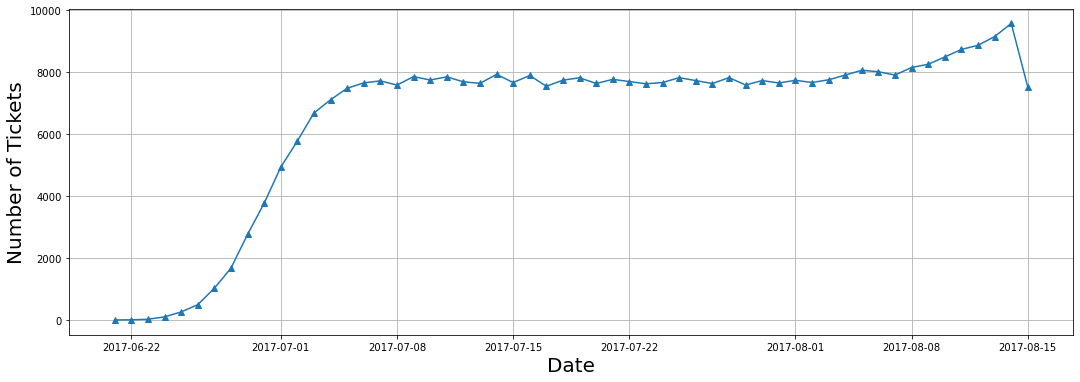

In [80]:
plt.figure(figsize=(18,6))
plt.plot(x.index,x['date'], marker= '^')
plt.xlabel('Date', fontsize=20)
plt.ylabel('Number of Tickets', fontsize=20)
plt.grid('b')
plt.show()

Observation: Here this plot shows the variation in number of Tickets over period of time. From June till Aug the avg tickets sold were around 8000 and 10000 being the highest number of tickets.

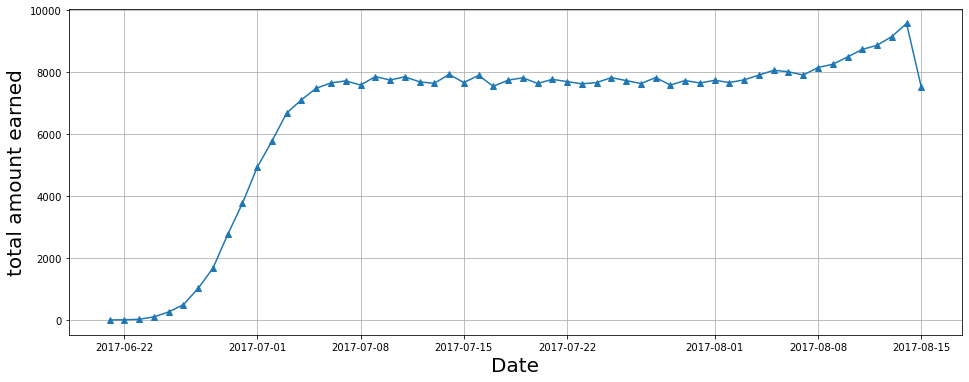

In [93]:
bookings= pd.read_sql_query("select *from bookings", connection)
df['book_date']= pd.to_datetime(df['book_date'])
df['date']=df['book_date'].dt.date
x=df.groupby('date')[["date"]].count()
plt.figure(figsize=(16,6))
plt.plot(x.index,x['date'], marker= '^')
plt.xlabel('Date', fontsize=20)
plt.ylabel('total amount earned', fontsize=20)
plt.grid('b')
plt.show()

Observation : This plot is similar to the above plot as the total amount earned depends on the number of Tickets.

4. Calculate the average charges for each aircraft with different fare conditions.

In [100]:
df=pd.read_sql_query("""select aircraft_code,fare_conditions, avg(amount) from ticket_flights inner join flights on 
                        ticket_flights.flight_id=flights.flight_id
                        group by aircraft_code, fare_conditions""", connection)

In [101]:
df

,aircraft_code,fare_conditions,avg(amount)
0,319,Business,113550.557703
1,319,Economy,38311.402347
2,321,Business,34435.662664
3,321,Economy,11534.974764
4,733,Business,41865.626175
5,733,Economy,13985.152000
6,763,Business,82839.842866
7,763,Economy,27594.721829
8,773,Business,57779.909435
9,773,Comfort,32740.552889


<AxesSubplot:xlabel='aircraft_code', ylabel='avg(amount)'>

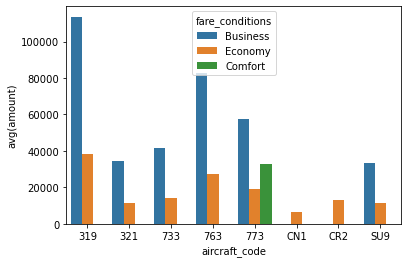

In [102]:
sns.barplot(data=df, x='aircraft_code', y='avg(amount)', hue='fare_conditions')

Observation: 
    1)It is clearly understood that only one aircraft i.e 773 has the comfort class.
    2) Both CN1 and CR2 have only Economy classes.
    3) The fare_conditions of Business class is higher than the Economy class in all aircrafts.
    4) The fare_conditions are higher in aircraft 319 for both Business and economy compared to other aircrafts.

5. For each aircraft calculate the total revenue per year and the avaerage revenue per ticket.

In [106]:
df=pd.read_sql_query("""select aircraft_code,ticket_count,total_revenue, total_revenue/ticket_count as avg_revenue_per_ticket from  
(select aircraft_code, count(*) as ticket_count, sum(amount) as total_revenue from ticket_flights 
join flights on ticket_flights.flight_id=flights.flight_id
                        group by aircraft_code)""", connection)                   

In [107]:
df

,aircraft_code,ticket_count,total_revenue,avg_revenue_per_ticket
0,319,52853,2706163100,51201
1,321,107129,1638164100,15291
2,733,86102,1426552100,16568
3,763,124774,4371277100,35033
4,773,144376,3431205500,23765
5,CN1,14672,96373800,6568
6,CR2,150122,1982760500,13207
7,SU9,365698,5114484700,13985


6. Calculate the average occupancy per aircraft.

In [109]:
occupancy_rate= pd.read_sql_query("""select a.aircraft_code, avg(a.seats_count) as booked_seats, b.num_seats, 
avg(a.seats_count)/b.num_seats as occupancy_rate from( select aircraft_code, flights.flight_id, count(*) as seats_count 
from boarding_passes inner join flights on boarding_passes.flight_id= flights.flight_id 
group by aircraft_code, flights.flight_id) as a inner join 
(select aircraft_code, count(*) as num_seats from seats group by aircraft_code) as b on a.aircraft_code=b.aircraft_code
group by a.aircraft_code""", connection)

In [110]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate
0,319,53.583181,116,0.461924
1,321,88.809231,170,0.522407
2,733,80.255462,130,0.617350
3,763,113.937294,222,0.513231
4,773,264.925806,402,0.659019
5,CN1,6.004431,12,0.500369
6,CR2,21.482847,50,0.429657
7,SU9,56.812113,97,0.585692


7. calculate by how much the total annual turnover could increase by giving all aircraft a 10% higher occupancy rate.

In [139]:
pd.set_option("display.float_format", str)

In [140]:
total_revenue= pd.read_sql_query("""select aircraft_code, sum(amount) as total_revenue 
                                from ticket_flights join flights on ticket_flights.flight_id= flights.flight_id 
                                group by aircraft_code""", connection)  

In [141]:
occupancy_rate['Inc occupancy rate']= occupancy_rate['occupancy_rate']+ occupancy_rate['occupancy_rate']*0.1
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Increase Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


In [144]:
total_revenue
occupancy_rate['Increase Total Annual Turnover']=(total_revenue['total_revenue']/occupancy_rate['occupancy_rate'])*occupancy_rate['Inc occupancy rate']

In [145]:
occupancy_rate

,aircraft_code,booked_seats,num_seats,occupancy_rate,Inc occupancy rate,Increase Total Annual Turnover
0,319,53.58318098720292,116,0.46192397402761143,0.5081163714303726,2976779410.0
1,321,88.80923076923077,170,0.5224072398190045,0.574647963800905,1801980510.0
2,733,80.25546218487395,130,0.617349709114415,0.6790846800258565,1569207310.0000002
3,763,113.93729372937294,222,0.5132310528350132,0.5645541581185146,4808404810.0
4,773,264.9258064516129,402,0.659019419033863,0.7249213609372492,3774326050.0
5,CN1,6.004431314623338,12,0.5003692762186115,0.5504062038404727,106011180.00000001
6,CR2,21.48284690220174,50,0.42965693804403476,0.4726226318484382,2181036550.0
7,SU9,56.81211267605634,97,0.5856918832583128,0.644261071584144,5625933169.999999


In [ ]:
# Inorder to find the relation between tickets and bookings

In [127]:
import sqlite3
import pandas as pd

database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'

# Establish the database connection using a with statement
with sqlite3.connect(database_path) as connection:
    # Query to get the number of tickets booked and total amount earned over time
    query = """
    SELECT
        bookings.book_ref,
        COUNT(tickets.ticket_no) AS num_tickets
    FROM
        bookings
        INNER JOIN tickets ON bookings.book_ref = tickets.book_ref
    GROUP BY
        bookings.book_ref
    ORDER BY
        num_tickets DESC;
    """

    # Execute the query and read into a DataFrame
    df = pd.read_sql_query(query, connection)

    # Print the DataFrame
    print(df)

       book_ref  num_tickets
0        E4EE9A            5
1        E4BF84            5
2        C4AC71            5
3        B7D627            5
4        9BF4CE            5
...         ...          ...
262783   00034E            1
262784   0002D8            1
262785   000068            1
262786   000012            1
262787   00000F            1

[262788 rows x 2 columns]


In [132]:
import sqlite3
import pandas as pd

database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'

# Establish the database connection using a with statement
with sqlite3.connect(database_path) as connection:
    # Query to get the booking reference with the maximum number of tickets booked
    query = """
    SELECT
        bookings.book_ref,
        COUNT(tickets.ticket_no) AS num_tickets
    FROM
        bookings
        INNER JOIN tickets ON bookings.book_ref = tickets.book_ref
    GROUP BY
        bookings.book_ref
    ORDER BY
        num_tickets DESC
    LIMIT 30;
    """

    # Execute the query and read into a DataFrame
    df = pd.read_sql_query(query, connection)

    # Print the DataFrame
    print("Booking Reference with Max Tickets Booked:")
    print(df)


Booking Reference with Max Tickets Booked:
   book_ref  num_tickets
0    E4EE9A            5
1    E4BF84            5
2    C4AC71            5
3    B7D627            5
4    9BF4CE            5
5    979E64            5
6    8F2A1E            5
7    8DA112            5
8    888EFF            5
9    81ED6B            5
10   7734A5            5
11   77302F            5
12   691398            5
13   65A6EA            5
14   6252BD            5
15   4A5EBF            5
16   46850C            5
17   414FC9            5
18   3B95A6            5
19   148C46            5
20   111C34            5
21   070682            5
22   070133            5
23   FF106E            4
24   FF060B            4
25   FEF285            4
26   FEF103            4
27   FEE70F            4
28   FE6879            4
29   FE37E2            4


Observation: 1) It is clearly understood that max tickets booked for a booking is 5.
    2) There are 21 booking references with maximum of 5 tickets booked. 

In [138]:
import sqlite3
import pandas as pd

database_path = r'C:\Users\14695\OneDrive\Desktop\python_projects\travel.sqlite'

# Establish the database connection using a with statement
with sqlite3.connect(database_path) as connection:
    # Query to get the booking reference with the maximum number of tickets booked
    query = """
    SELECT aircrafts_data.aircraft_code,
    COUNT(flights.flight_id) AS num_flights
    FROM
    aircrafts_data
    INNER JOIN flights ON aircrafts_data.aircraft_code = flights.aircraft_code
    GROUP BY
    aircrafts_data.model
    ORDER BY
    num_flights DESC;

    """

    # Execute the query and read into a DataFrame
    df = pd.read_sql_query(query, connection)

    # Print the DataFrame
    print("Booking Reference with Max Tickets Booked:")
    print(df)

Booking Reference with Max Tickets Booked:
  aircraft_code  num_flights
0           CN1         9273
1           CR2         9048
2           SU9         8504
3           321         1952
4           733         1274
5           319         1239
6           763         1221
7           773          610
